In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
data_path = "/content/drive/MyDrive/Hitachi/Data/updated_categorical_data.csv"
data_df = pd.read_csv(data_path)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34899 entries, 0 to 34898
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Prices
(EUR/MWh)                34899 non-null  float64
 1   datetime                        34899 non-null  object 
 2   Demand (MW)                     27555 non-null  float64
 3   Name                            27720 non-null  object 
 4   Temperature                     27720 non-null  float64
 5   feelslike                       27720 non-null  float64
 6   dewpoint                        27720 non-null  float64
 7   humidity                        27720 non-null  float64
 8   precipitation                   27720 non-null  float64
 9   precipprob                      27720 non-null  float64
 10  snow                            27702 non-null  float64
 11  snowdepth                       27702 non-null  float64
 12  windgust                        

<ipython-input-2-d0fc5dbd08f2>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(data_path)


In [3]:
data_path = "/content/drive/MyDrive/Hitachi/Data/imputed_data.csv"
data_df = pd.read_csv(data_path)
data_df.info()
length = data_df['Demand (MW)'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Prices
(EUR/MWh)                27555 non-null  float64
 1   datetime                        27555 non-null  object 
 2   Demand (MW)                     27555 non-null  float64
 3   Temperature                     27555 non-null  float64
 4   feelslike                       27555 non-null  float64
 5   dewpoint                        27555 non-null  float64
 6   humidity                        27555 non-null  float64
 7   precipitation                   27555 non-null  float64
 8   precipprob                      27555 non-null  float64
 9   snow                            27555 non-null  float64
 10  snowdepth                       27555 non-null  float64
 11  windgust                        27555 non-null  float64
 12  windspeed                       

In [4]:
data_df.tail()

,Prices\n(EUR/MWh),datetime,Demand (MW),Temperature,feelslike,dewpoint,humidity,precipitation,precipprob,snow,...,ice,rain,snow.1,Clear,Freezing Drizzle/Freezing Rain,Ice,Overcast,Partially cloudy,Rain,Snow
27550,199.56,2023-02-21 19:00:00,498.7,50.0,49.4,29.0,44.19,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
27551,192.15,2023-02-21 20:00:00,498.8,50.0,49.4,28.1,42.59,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
27552,164.98,2023-02-21 21:00:00,506.4,53.1,53.1,26.1,34.92,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
27553,151.39,2023-02-21 22:00:00,478.8,53.1,53.1,28.1,38.02,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
27554,139.13,2023-02-21 23:00:00,457.7,53.1,53.1,30.8,42.44,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


# **Local Trends**

<ipython-input-14-efab7560389d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_average = data_df.groupby('hours').mean()['Demand (MW)']


Text(0.5, 0, 'hour')

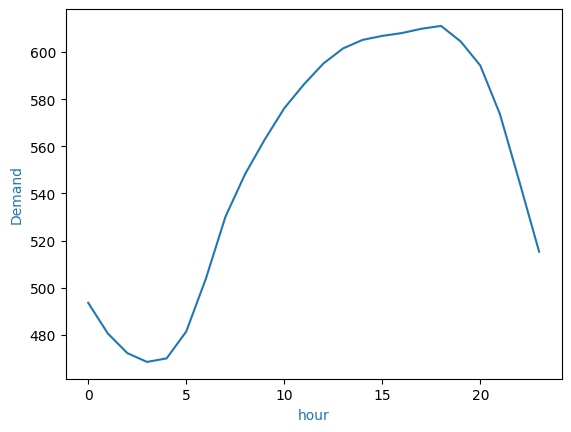

In [14]:
#Daily trend average plot
data_df['hours'] = data_df['datetime'].apply(lambda x: x[-8:-6])
hourly_average = data_df.groupby('hours').mean()['Demand (MW)']
hours = range(0,24,1)


plt.plot(hours, hourly_average, color = 'tab:blue')
plt.ylabel('Demand (MW)',color = 'tab:blue')
plt.xlabel('hour',color = 'tab:blue')

<ipython-input-17-15356c3d2da1>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dayly_average = data_df.groupby('day').mean()['Demand (MW)']


Text(0.5, 0, 'day')

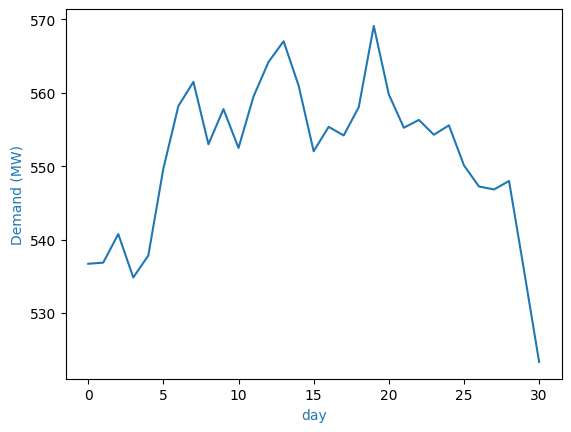

In [17]:
#Monthly trend average plot
data_df['day'] = data_df['datetime'].apply(lambda x: x[8:10])
dayly_average = data_df.groupby('day').mean()['Demand (MW)']
days = range(0,31,1)


plt.plot(days, dayly_average, color = 'tab:blue')
plt.ylabel('Demand (MW)',color = 'tab:blue')
plt.xlabel('day',color = 'tab:blue')

<ipython-input-20-f49123bbd09b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_average = data_df.groupby('month').mean()['Demand (MW)']


Text(0.5, 0, 'month')

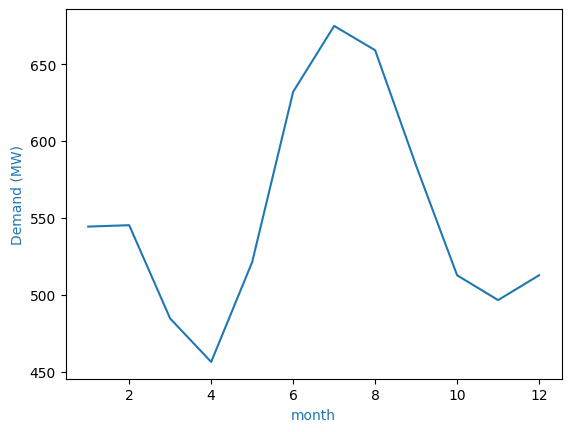

In [20]:
#Yearly trend average plot
data_df['month'] = data_df['datetime'].apply(lambda x: x[5:7])
monthly_average = data_df.groupby('month').mean()['Demand (MW)']
months = [m+1 for m in range(0,12,1)]


plt.plot(months, monthly_average, color = 'tab:blue')
plt.ylabel('Demand (MW)',color = 'tab:blue')
plt.xlabel('month',color = 'tab:blue')

# **Global Trend**

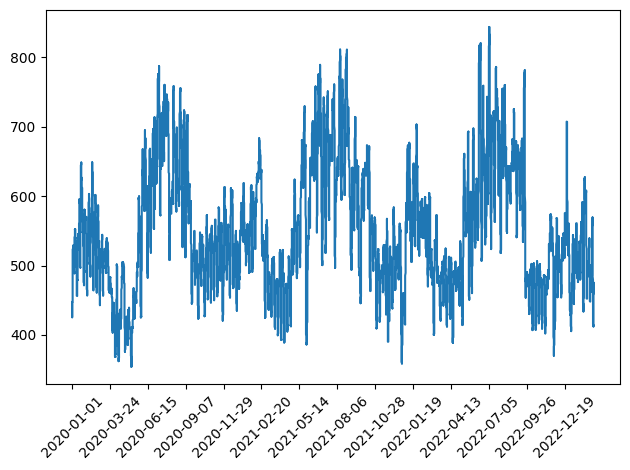

In [27]:


# Global trend smoothened with
# Define the window size
window_size = 24


time = data_df['datetime'].apply(lambda x:x[0:10])
rolling_mean = data_df['Demand (MW)'].rolling(window=window_size, min_periods=1).mean()
selected_time_values = [time[i] for i in range(0,len(time),2000)]


plt.plot(time,rolling_mean)
plt.xticks(selected_time_values, rotation=45)

plt.tight_layout()
plt.show()


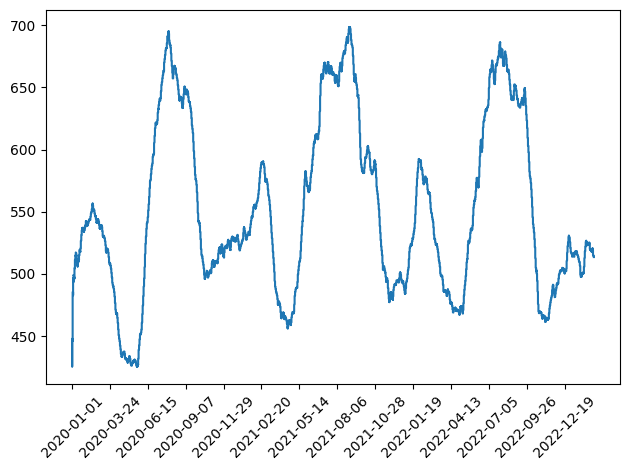

In [28]:
# Global trend smoothened more
# Define the window size
window_size = 720


time = data_df['datetime'].apply(lambda x:x[0:10])
rolling_mean = data_df['Demand (MW)'].rolling(window=window_size, min_periods=1).mean()
selected_time_values = [time[i] for i in range(0,len(time),2000)]


plt.plot(time,rolling_mean)
plt.xticks(selected_time_values, rotation=45)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'years')

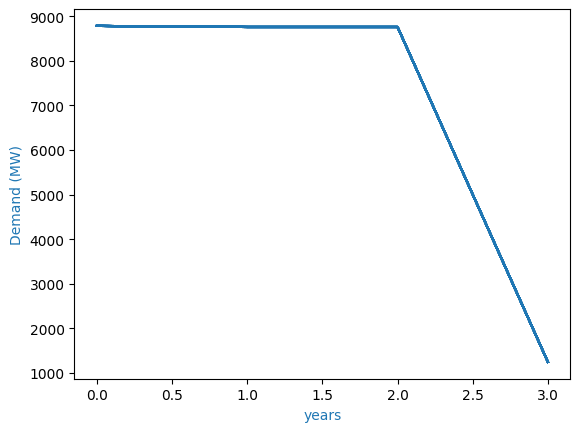

In [33]:
# Is the demand increasing from 2020 to 2022?

data_df['year'] = data_df['datetime'].apply(lambda x: x[0:4])
yearly_average = data_df.groupby('year').count()
years = range(0,4,1)


plt.plot(years, yearly_average, color = 'tab:blue')
plt.ylabel('Demand (MW)',color = 'tab:blue')
plt.xlabel('years',color = 'tab:blue')

<ipython-input-35-6c6bfd73744b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_average = data_df.groupby('year').mean()['Demand (MW)']


Text(0.5, 0, 'years')

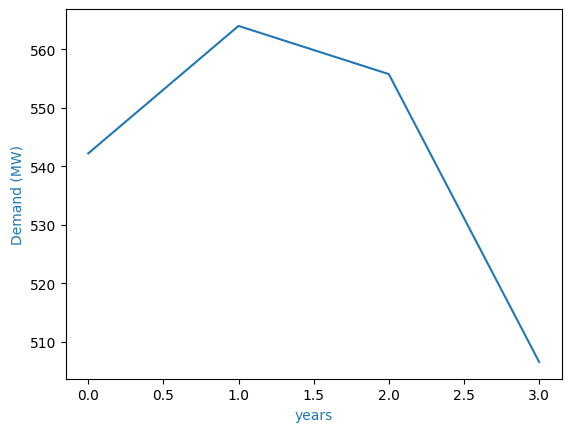

In [35]:
data_df['year'] = data_df['datetime'].apply(lambda x: x[0:4])
yearly_average = data_df.groupby('year').mean()['Demand (MW)']
years = range(0,4,1)


plt.plot(years, yearly_average, color = 'tab:blue')
plt.ylabel('Demand (MW)',color = 'tab:blue')
plt.xlabel('years',color = 'tab:blue')